In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# 1. Data loading and preparation

In [3]:
# data source: https://snap.stanford.edu/data/facebook-large-page-page-network.html

nodes = pd.read_csv("musae_facebook_target.csv")
edges = pd.read_csv("musae_facebook_edges.csv")
edges = edges.astype("int")

In [4]:
nodes.head()

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician


In [5]:
nodes.shape

(22470, 4)

In [6]:
with open("musae_facebook_features.json") as json_data:
    data = json.load(json_data)

col_names = []
for i in range(31):
    a = '{}{}'.format('f', i)
    col_names.append(a)

features = pd.DataFrame.from_dict(data=data, orient='index', columns=col_names)
features['id'] = features.index
features.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f22,f23,f24,f25,f26,f27,f28,f29,f30,id
554,2835,4518,2198,2014.0,3818.0,3045.0,4570.0,4585.0,4596.0,4599.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,554
10772,3293,2534,979,2014.0,2317.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10772
6350,4477,2895,4039,3282.0,765.0,2669.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6350
9218,3133,2052,979,3355.0,107.0,1878.0,1105.0,4571.0,4582.0,4593.0,...,4713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9218
7787,1151,631,2613,2791.0,648.0,1684.0,3818.0,107.0,1878.0,1105.0,...,4678.0,4695.0,4696.0,4708.0,NaN,NaN,NaN,NaN,NaN,7787


In [7]:
# impute null values with mean values

features_name = []
for i in range(31):
    a = '{}{}'.format('f',i)
    features_name.append(a)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
features_tf = imputer.fit_transform(features.iloc[:, :-1])
features_tf = pd.DataFrame(features_tf, columns=features_name, index = features.index)
features_tf = features_tf.astype('int')
features_tf.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
554,2835,4518,2198,2014,3818,3045,4570,4585,4596,4599,...,4708,4699,4702,4704,4705,4706,4705,4707,4707,4708
10772,3293,2534,979,2014,2317,2397,2530,2890,3440,4055,...,4693,4699,4702,4704,4705,4706,4705,4707,4707,4708
6350,4477,2895,4039,3282,765,2669,2530,2890,3440,4055,...,4693,4699,4702,4704,4705,4706,4705,4707,4707,4708
9218,3133,2052,979,3355,107,1878,1105,4571,4582,4593,...,4704,4713,4702,4704,4705,4706,4705,4707,4707,4708
7787,1151,631,2613,2791,648,1684,3818,107,1878,1105,...,4670,4678,4695,4696,4708,4706,4705,4707,4707,4708


In [8]:
features_tf.shape

(22470, 31)

In [ ]:
# check data distribution of feature_tf df

# plt.figure(figsize=(15,6))
# ax = sns.violinplot(data=features_tf)
# _ = ax.set_xticklabels(features_name, rotation=90)

In [ ]:
# detect outliers

# q25 = features_tf.quantile(0.25)
# q75 = features_tf.quantile(0.75)
# iqr = q75-q25

# mask = (features_tf < (q25 - 1.5*iqr)) | (features_tf > (q75 + 1.5*iqr)) # set the cap
# features_tf[mask] = np.nan # set the cap from the dataframe

In [9]:
# concatenate with id var

features_tf = pd.concat([features_tf, features.id], axis=1)
features_tf.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f22,f23,f24,f25,f26,f27,f28,f29,f30,id
554,2835,4518,2198,2014,3818,3045,4570,4585,4596,4599,...,4699,4702,4704,4705,4706,4705,4707,4707,4708,554
10772,3293,2534,979,2014,2317,2397,2530,2890,3440,4055,...,4699,4702,4704,4705,4706,4705,4707,4707,4708,10772
6350,4477,2895,4039,3282,765,2669,2530,2890,3440,4055,...,4699,4702,4704,4705,4706,4705,4707,4707,4708,6350
9218,3133,2052,979,3355,107,1878,1105,4571,4582,4593,...,4713,4702,4704,4705,4706,4705,4707,4707,4708,9218
7787,1151,631,2613,2791,648,1684,3818,107,1878,1105,...,4678,4695,4696,4708,4706,4705,4707,4707,4708,7787


In [10]:
# drop nan values from outlier detection

# features_tf.dropna(inplace=True) 
# features_tf.shape

In [11]:
# plt.figure(figsize=(15,6))
# ax2 = sns.violinplot(data=features_tf.iloc[:, :-1])
# _ = ax2.set_xticklabels(features_name, rotation=90)

In [12]:
# normalize the data

from sklearn.preprocessing import StandardScaler

mm = StandardScaler()
features_scaled = mm.fit_transform(features_tf.iloc[:, :-1])
features_scaled = pd.DataFrame(features_scaled, columns=features_name, index = features_tf.index)
features_scaled = pd.concat([features_scaled, features_tf.id], axis=1)
features_scaled.id = features_scaled.id.astype('int')

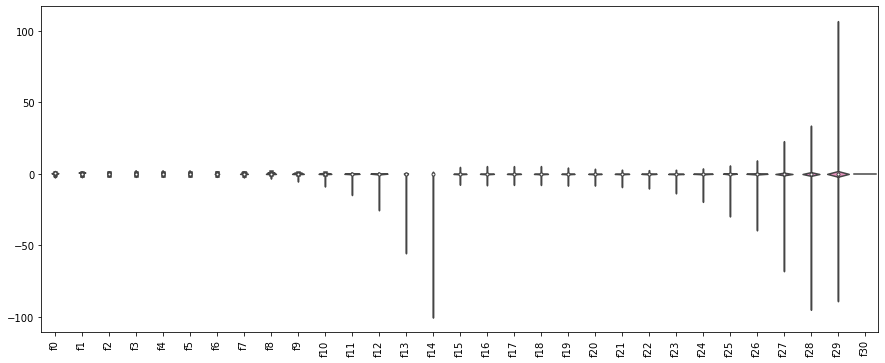

In [13]:
plt.figure(figsize=(15,6))
ax2 = sns.violinplot(data=features_scaled.iloc[:, :-1])
_ = ax2.set_xticklabels(features_name, rotation=90)

In [14]:
# remove feature variables with value = 0

features_selected = ['{}{}'.format('f', i) for i in range(30)]
features_scaled = features_scaled[features_selected]
features_scaled['id'] = features_scaled.index.astype('int')
features_scaled.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,id
554,-0.007785,1.461122,-0.130119,-0.185665,1.161585,0.485814,1.523120,1.320769,1.025445,0.688097,...,1.996603,-0.002801,-0.030326,-0.016600,-0.006109,0.0,-0.004157,-0.005967,-0.002375,554
10772,0.472523,-0.114964,-1.016775,-0.185665,-0.008433,-0.000152,-0.000482,-0.000174,-0.000100,-0.000403,...,-0.020437,-0.002801,-0.030326,-0.016600,-0.006109,0.0,-0.004157,-0.005967,-0.002375,10772
6350,1.714192,0.171814,1.208959,0.863444,-1.218204,0.203834,-0.000482,-0.000174,-0.000100,-0.000403,...,-0.020437,-0.002801,-0.030326,-0.016600,-0.006109,0.0,-0.004157,-0.005967,-0.002375,6350
9218,0.304730,-0.497863,-1.016775,0.923843,-1.731110,-0.389374,-1.064763,1.309859,1.013025,0.680504,...,1.458726,2.372091,-0.030326,-0.016600,-0.006109,0.0,-0.004157,-0.005967,-0.002375,9218
7787,-1.773808,-1.626703,0.171738,0.457204,-1.309404,-0.534864,0.961478,-2.169014,-1.385828,-3.733997,...,-3.113232,-3.565139,-1.731477,-3.177621,2.105710,0.0,-0.004157,-0.005967,-0.002375,7787


In [15]:
# merge features into nodes dataframe

nodes = nodes.merge(features_scaled, how ='inner', on='id')
nodes.head()

,id,facebook_id,page_name,page_type,f0,f1,f2,f3,f4,f5,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
0,0,145647315578475,The Voice of China 中国好声音,tvshow,0.304730,0.910604,-1.557207,-1.128870,-0.978900,-1.690532,...,-0.041743,-0.020437,-0.002801,-0.030326,-0.0166,-0.006109,0.0,-0.004157,-0.005967,-0.002375
1,1,191483281412,U.S. Consulate General Mumbai,government,0.583686,-1.653712,-1.016775,-0.185665,-0.000638,-0.000152,...,-0.041743,-0.020437,-0.002801,-0.030326,-0.0166,-0.006109,0.0,-0.004157,-0.005967,-0.002375
2,2,144761358898518,ESET,company,0.566907,0.916165,-0.248679,-1.219054,1.281626,0.725047,...,0.078431,-0.692783,-0.342071,2.642910,-0.0166,-0.006109,0.0,-0.004157,-0.005967,-0.002375
3,3,568700043198473,Consulate General of Switzerland in Montreal,government,-0.138873,-0.570948,-0.317778,1.882768,1.567700,-1.227065,...,-0.041743,-0.020437,-0.002801,-0.030326,-0.0166,-0.006109,0.0,-0.004157,-0.005967,-0.002375
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician,0.032066,1.461122,1.569731,-0.526543,0.913706,1.544739,...,-0.041743,-0.020437,-0.002801,-0.030326,-0.0166,-0.006109,0.0,-0.004157,-0.005967,-0.002375


In [16]:
nodes.shape

(22470, 34)

In [17]:
# 3. Graph Creation

In [18]:
# remove id from edges which are not in nodes

node_id_unique = list(nodes.id.unique())
edges = edges[edges['id_1'].isin(node_id_unique)]
edges = edges[edges['id_2'].isin(node_id_unique)]

In [19]:
import networkx as nx 

G = nx.Graph()

# add nodes
for node in nodes.iloc[:,0]:
    G.add_node(int(node))

# add edges
edge_1 = list(edges['id_1'])
edge_2 = list(edges['id_2'])

for i, j in zip(edge_1, edge_2):
    G.add_edge(int(i), int(j))

In [20]:
G.number_of_nodes()

22470

In [21]:
G.number_of_edges()

171002

In [22]:
# 4. Graph Neural Network Modelling

In [23]:
# define the feature variable

feature = nodes[features_selected]
feature = feature.set_index(nodes['id'])

In [24]:
# define the label variable

nodes['label'] = nodes['page_type']
label = nodes['label']

from collections import Counter
Counter(label)

Counter({'tvshow': 3327,
         'government': 6880,
         'company': 6495,
         'politician': 5768})

In [25]:
# label encode the label variable

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

nodes['target'] = lb.fit_transform(label)
target = nodes['target']

In [26]:
# check the correlation of feature and target variables

# target = pd.DataFrame(target, columns=['target'])
# df_feature_target = pd.concat([feature, target], axis=1)
# cor = df_feature_target.corr()

# plt.figure(figsize=(10,10))
# sns.heatmap(cor, xticklabels=df_feature_target.columns, yticklabels=df_feature_target.columns, annot=True)
# plt.show()

In [27]:
# impute class weights to compensate for class imbalance
# class weights will be applied when fitting the model

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight("balanced", np.unique(target), target)
print(dict(zip(np.unique(target), class_weights)))

{0: 0.8648960739030023, 1: 0.8164970930232558, 2: 0.9739077669902912, 3: 1.6884580703336338}


In [28]:
# one-hot encode the target variable

from keras.utils import np_utils
target_4d = np_utils.to_categorical(target)

In [29]:
# split the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature, target_4d, train_size=0.8, random_state=42)

In [30]:
# create the graph model

import stellargraph as sg
from stellargraph.mapper import GraphSAGENodeGenerator, FullBatchNodeGenerator
from stellargraph.layer import GraphSAGE, GCN, GAT
from stellargraph import globalvar

In [31]:
from tensorflow.keras import layers, optimizers, losses, metrics, Model

In [32]:
gnn = sg.StellarGraph.from_networkx(G, node_features=feature)

In [33]:
# a generator is required to send node features in sampled subgraphs to keras
generator = FullBatchNodeGenerator(gnn, method='gat') 

# flow dataset to the generator 
train_gen = generator.flow(x_train.index, y_train)
test_gen = generator.flow(x_test.index, y_test)

In [81]:
# specify the model

gat = GAT(layer_sizes=[8,y_train.shape[1]], activations=['elu', 'softmax'], attn_heads=8, 
                        generator=generator,kernel_regularizer='l2', normalize=None)
x_in, prediction = gat.in_out_tensors()
# hidden_layer = layers.Dense(units=128, activation='relu')(x_out)
# hidden_layer2 = layers.Dense(units=64, activation='relu')(hidden_layer)
# hidden_layer3 = layers.Dense(units=32, activation='relu')(hidden_layer2)
# hidden_layer4 = layers.Dense(units=16, activation='relu')(hidden_layer3)
# prediction = layers.Dense(units=4, activation='softmax')(hidden_layer4)

In [89]:
model = Model(inputs=x_in, outputs=prediction)
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss=losses.categorical_crossentropy, metrics=['acc'])

In [90]:
epochs=200
batch_size=200

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc', patience=20)

history = model.fit(train_gen, validation_data=test_gen, epochs=epochs, 
                    batch_size=batch_size, verbose=2, shuffle=False, callbacks=[es])

Epoch 1/200
1/1 - 1s - loss: 0.7661 - acc: 0.8121 - val_loss: 0.7849 - val_acc: 0.8013
Epoch 2/200
1/1 - 0s - loss: 0.7659 - acc: 0.8125 - val_loss: 0.7847 - val_acc: 0.8024
Epoch 3/200
1/1 - 0s - loss: 0.7658 - acc: 0.8128 - val_loss: 0.7846 - val_acc: 0.8020
Epoch 4/200
1/1 - 0s - loss: 0.7659 - acc: 0.8126 - val_loss: 0.7845 - val_acc: 0.8022
Epoch 5/200
1/1 - 0s - loss: 0.7659 - acc: 0.8125 - val_loss: 0.7845 - val_acc: 0.8022
Epoch 6/200
1/1 - 0s - loss: 0.7658 - acc: 0.8124 - val_loss: 0.7845 - val_acc: 0.8020
Epoch 7/200
1/1 - 0s - loss: 0.7658 - acc: 0.8128 - val_loss: 0.7845 - val_acc: 0.8022
Epoch 8/200
1/1 - 0s - loss: 0.7657 - acc: 0.8129 - val_loss: 0.7845 - val_acc: 0.8026
Epoch 9/200
1/1 - 0s - loss: 0.7657 - acc: 0.8130 - val_loss: 0.7846 - val_acc: 0.8024
Epoch 10/200
1/1 - 0s - loss: 0.7657 - acc: 0.8128 - val_loss: 0.7846 - val_acc: 0.8017
Epoch 11/200
1/1 - 0s - loss: 0.7657 - acc: 0.8125 - val_loss: 0.7846 - val_acc: 0.8020
Epoch 12/200
1/1 - 0s - loss: 0.7657 - ac

In [91]:
model.evaluate(train_gen)
model.evaluate(test_gen)

1/1 [==============================] - 0s 6ms/step - loss: 0.7841 - acc: 0.8026


[0.7840874195098877, 0.8026257157325745]

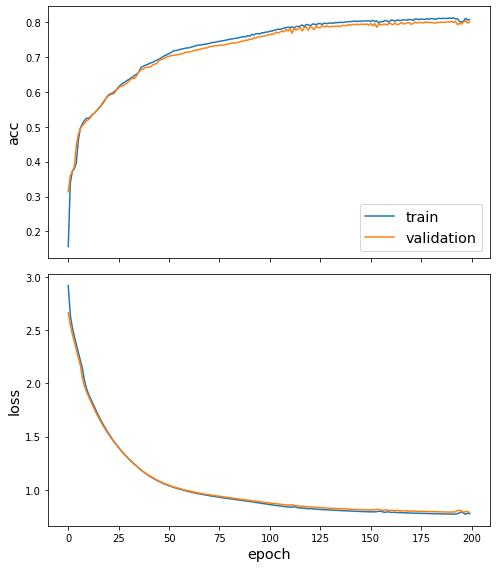

In [85]:
sg.utils.plot_history(history)

In [94]:
# make predictions
y_pred = model.predict(test_gen)
y_pred = y_pred.reshape(y_test.shape[0], y_test.shape[1])

In [95]:
# inverse probabilities to classes and labels

y_pred_class = [np.argmax(i, axis=None, out=None) for i in y_pred]
y_pred_label = lb.inverse_transform(y_pred_class)

y_test_class = [np.argmax(i, axis=None, out=None) for i in y_test]
y_test_label = lb.inverse_transform(y_test_class)

In [96]:
prediction_df = pd.DataFrame({'Prediction Class': y_pred_class,
                              'Actual Class': y_test_class,
                              'Prediction Label': y_pred_label,
                              'Actual Label': y_test_label})

prediction_df.head()

,Prediction Class,Actual Class,Prediction Label,Actual Label
0,0,3,company,tvshow
1,2,0,politician,company
2,1,1,government,government
3,0,3,company,tvshow
4,2,2,politician,politician


In [97]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(prediction_df['Actual Class'].values, prediction_df['Prediction Class'].values)
matrix_df = pd.DataFrame(matrix, columns=range(4), index=range(4))
matrix_df.head()

,0,1,2,3
0,1076,122,34,108
1,96,1181,67,14
2,47,70,979,29
3,182,56,62,371


In [98]:
from sklearn.metrics import classification_report

report = classification_report(y_test_class, y_pred_class)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1340
           1       0.83      0.87      0.85      1358
           2       0.86      0.87      0.86      1125
           3       0.71      0.55      0.62       671

    accuracy                           0.80      4494
   macro avg       0.79      0.77      0.78      4494
weighted avg       0.80      0.80      0.80      4494

